In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [2]:
# IMPORT CÁC THƯ VIỆN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# NẠP VÀ KHẢO SÁT DỮ LIỆU
df = pd.read_csv("Data_Python_ST3/BT2/animal.csv")

print("Kích thước dữ liệu:", df.shape)
print(df.head())
print("\nThông tin dữ liệu:")
print(df.info())

Kích thước dữ liệu: (871, 7)
  AnimalName symptoms1             symptoms2 symptoms3    symptoms4  \
0        Dog     Fever              Diarrhea  Vomiting  Weight loss   
1        Dog     Fever              Diarrhea  Coughing    Tiredness   
2        Dog     Fever              Diarrhea  Coughing     Vomiting   
3        Dog     Fever  Difficulty breathing  Coughing     Lethargy   
4        Dog     Fever              Diarrhea  Coughing     Lethargy   

     symptoms5 Dangerous  
0  Dehydration       Yes  
1        Pains       Yes  
2     Anorexia       Yes  
3     Sneezing       Yes  
4     Blue Eye       Yes  

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   8

In [4]:
# 3️⃣ XỬ LỮ DỮ LIỆU
# Loại bỏ các cột không cần thiết nếu có
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)

# Kiểm tra dữ liệu bị khuyết
print("\nSố giá trị thiếu trong mỗi cột:")
print(df.isnull().sum())

# Điền giá trị thiếu nếu cần
df.fillna(df.median(numeric_only=True), inplace=True)

# Mã hóa dữ liệu phân loại (nếu có)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Số giá trị thiếu trong mỗi cột:
AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64


In [5]:
# TÁCH DỮ LIỆU TRAIN/TEST VÀ CHUẨN HÓA
target_col = "Dangerous"

X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# HUẤN LUYỆN MÔ HÌNH SVM
clf = svm.SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n=== KẾT QUẢ SVM (Kernel RBF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== KẾT QUẢ SVM (Kernel RBF) ===
Accuracy: 0.9885714285714285
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      0.99       173

    accuracy                           0.99       175
   macro avg       0.49      0.50      0.50       175
weighted avg       0.98      0.99      0.98       175



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
# TÌM THAM SỐ TỐI ƯU BẰNG GRID SEARCH
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("\ Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

<>:11: SyntaxWarning: invalid escape sequence '\ '
<>:11: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-890782058.py:11: SyntaxWarning: invalid escape sequence '\ '
  print("\ Best Parameters:", grid.best_params_)
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


\ Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 0.9712641315519013


In [8]:
# ĐÁNH GIÁ MÔ HÌNH TỐI ƯU
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("\n=== MÔ HÌNH SVM TỐI ƯU ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


=== MÔ HÌNH SVM TỐI ƯU ===
Accuracy: 0.9885714285714285
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      0.99       173

    accuracy                           0.99       175
   macro avg       0.49      0.50      0.50       175
weighted avg       0.98      0.99      0.98       175



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


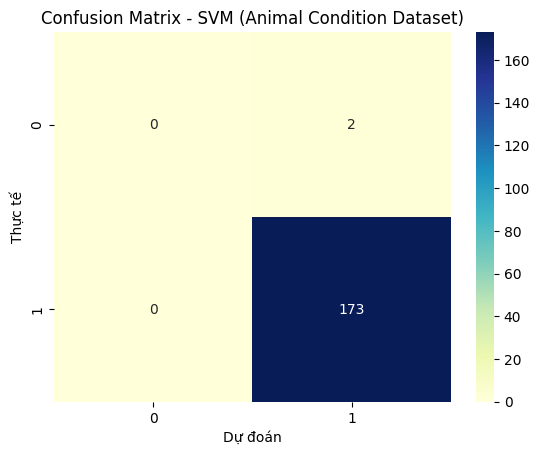

In [9]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - SVM (Animal Condition Dataset)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

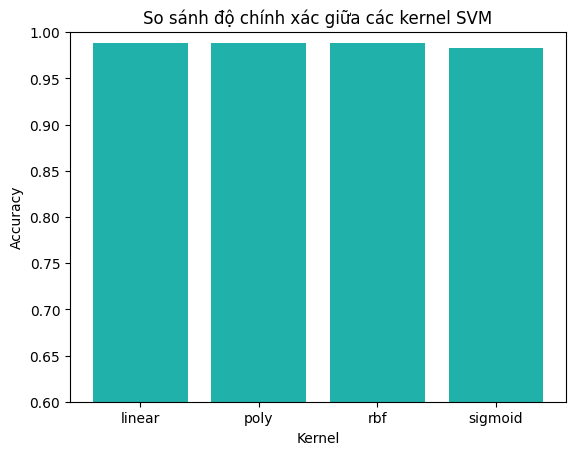

In [10]:
# SO SÁNH CÁC KERNEL
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []

for k in kernels:
    model = svm.SVC(kernel=k, C=1, gamma='scale')
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.bar(kernels, scores, color='lightseagreen')
plt.title("So sánh độ chính xác giữa các kernel SVM")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.show()